In [64]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
def benford(digit):
    prob_dig = np.round(math.log10(1 + 1 / digit),3)
    return prob_dig

In [66]:
benford(7)

0.058

In [67]:
def leading_digit(number):
    number = str(number)
    return int(number[0])

In [68]:
leading_digit(435)

4

In [69]:
leading_digit(3342343)

3

In [70]:
italy_covid19 = pd.read_csv("Italy_COVID19.csv", sep=';', decimal=',', index_col='DATE')

In [71]:
italy_covid19.head(5)

,ABR,BAS,BZ,CAL,CAM,EMR,FVG,LAZ,LIG,LOM,...,MOL,PIE,PUG,SAR,SIC,TN,TOS,UMB,VDA,VEN
DATE,,,,,,,,,,,,,,,,,,,,,
31/01/2020,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
06/02/2020,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21/02/2020,0,0,0,0,0,0,0,0,0,15,...,0,0,0,0,0,0,0,0,0,2
22/02/2020,0,0,0,0,0,2,0,0,0,40,...,0,1,0,0,0,0,0,0,0,16
23/02/2020,0,0,0,0,0,7,0,0,0,57,...,0,2,0,0,0,0,0,0,0,7


In [72]:
italy_covid19.dtypes

ABR     int64
BAS     int64
BZ      int64
CAL     int64
CAM     int64
EMR     int64
FVG     int64
LAZ     int64
LIG    object
LOM    object
MAR     int64
MOL     int64
PIE    object
PUG     int64
SAR     int64
SIC    object
TN      int64
TOS     int64
UMB     int64
VDA     int64
VEN     int64
dtype: object

In [73]:
def clean_data(data):
    for i in range(len(data)):
        if data.loc[i][0] == '–':
            data.loc[i] = str(0)
        if '.' in data.loc[i]:
            data.loc[i] = data.loc[i].replace('.', '')
    
    return data

In [74]:
for col in italy_covid19.columns:  
    if italy_covid19[col].dtype == 'object':
        tmp_series = italy_covid19[col].reset_index(drop=True)
        tmp_series = clean_data(tmp_series)
        tmp_series = tmp_series.astype('int64')
        tmp_series.index = italy_covid19.index
        italy_covid19[col] = tmp_series

In [75]:
italy_covid19.dtypes

ABR    int64
BAS    int64
BZ     int64
CAL    int64
CAM    int64
EMR    int64
FVG    int64
LAZ    int64
LIG    int64
LOM    int64
MAR    int64
MOL    int64
PIE    int64
PUG    int64
SAR    int64
SIC    int64
TN     int64
TOS    int64
UMB    int64
VDA    int64
VEN    int64
dtype: object

In [76]:
italy_covid19[italy_covid19 < 0] = 0

In [77]:
max_cases = italy_covid19.max().max()
max_cases

3251

In [78]:
for col in italy_covid19.columns:
    tmp_series = italy_covid19.loc[italy_covid19[col] == max_cases].T
    if tmp_series.size != 0:
        print((tmp_series == max_cases).sum())    # to get how many maximum values we have
        print(tmp_series.idxmax())

DATE
21/03/2020    1
dtype: int64
DATE
21/03/2020    LOM
dtype: object


In [79]:
prob_dict = {}
for val in range(1, 10):
    prob_dict[val] = 0
for val in italy_covid19.values.reshape(-1):
    if leading_digit(val) != 0:
        prob_dict[leading_digit(val)] += 1
        
prob_dict

{1: 326, 2: 142, 3: 98, 4: 94, 5: 91, 6: 61, 7: 65, 8: 53, 9: 50}

In [80]:
prob_list = []
for i in range(9, 0, -1):
    prob_list.append(prob_dict[i] / prob_dict[1])
    
prob_list.reverse()

In [81]:
prob_list_2 = []
cum_prob = 0
for i in range(1, 10):
    cum_prob += prob_dict[i]
for i in range(9, 0, -1):
    prob_list_2.append(np.round(100 * prob_dict[i] / cum_prob, 1))
    
prob_list_2.reverse()
prob_list_2

[33.3, 14.5, 10.0, 9.6, 9.3, 6.2, 6.6, 5.4, 5.1]

In [82]:
y_labels = []
for i in range(9, 0, -1):
    y_labels.append(f'{i} | P({i}): {prob_list_2[i - 1]} %')
    
y_labels.reverse()
y_labels

['1 | P(1): 33.3 %',
 '2 | P(2): 14.5 %',
 '3 | P(3): 10.0 %',
 '4 | P(4): 9.6 %',
 '5 | P(5): 9.3 %',
 '6 | P(6): 6.2 %',
 '7 | P(7): 6.6 %',
 '8 | P(8): 5.4 %',
 '9 | P(9): 5.1 %']

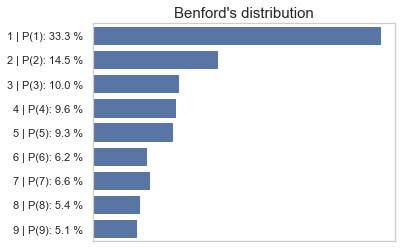

In [83]:
sns.set_theme(style='whitegrid')
sns.barplot(x=prob_list, y=y_labels, orient='h', color=sns.color_palette()[0])
plt.xticks([0], '')
plt.title("Benford's distribution", fontsize=15);
plt.subplots_adjust(left=0.2)
plt.savefig('Italian_leading_digit_distribution.png')

In [84]:
occurences = []
percent = []

for i in range(1, 10):
    occurences.append(prob_dict[i])
    percent.append(prob_dict[i] / cum_prob)

italian_leading_digit_distribution = pd.DataFrame({'Occurences': occurences, 'Percent': percent}, index=np.arange(1, 10))
italian_leading_digit_distribution.index.name = 'Leading digit'
italian_leading_digit_distribution

,Occurences,Percent
Leading digit,,
1,326,0.332653
2,142,0.144898
3,98,0.100000
4,94,0.095918
5,91,0.092857
6,61,0.062245
7,65,0.066327
8,53,0.054082
9,50,0.051020


In [85]:
italian_leading_digit_distribution.to_csv('Italian_leading_digit_distribution.csv', sep=',')